## Planning

### Summary:
WidgetCo is a new international business selling widgets to customers in China, France, Canada, and the United States. In determining the suitability to conduct business in these countries, WidgetCo executives need an effective data analysis of the datasets that are available. You are working on WidgetCo's data analysis team. Your team will provide recommendations to the WidgetCo executives about opportunities and challenges that they may encounter now or in the future. Using the datasets given, in addition to your own supplemental research, analyze the data and provide analyses and recommendations about the opportunities and challenges facing the business.

### Todo list:
- Extract Relevant Data for the 4 countries
- Determine value of the 12 metrics in the data files for a company
    - Pick the most relevant economic indicators to do forecasting on
        - Factors picked:
            - GDP (mention GDP Growth)
            - GDP per capita (mention Total Population and Population Growth)
            - Inflation
            - Unemployement
        - Factors not picked:
            - Life expectancy at birth
            - Net migration
            - personal remittances
            - Poverty Headcount Ratio
            - Human Capital Index
    - Give in-text citations for why each metric is important
- Develop ARIMA model to forecast future values (present - 2 years out, 5 years out, 10 years out) of the factors for each country
- Devevelop a polynomial smoothing (unless we find something else) mode for the long term. In additon, stick to overfitting to make sure the model looks good.
- Graph all ARIMA models
    - Analyze each graph for trends and show why the raw data confirms the trends presented in each graph
- Advise WidgetCo on the best plan of action, citing graph trends, and identify at least 3 resources for it
- Create bibliography for the sources used throughout the presentation


- Put Copyright for Packages Imported for Python

- Maybe explicitly state that data is public and not copyrighted (copyright-free)

### Nats Changes:
- Combine Graphs of same units for each country when appropriate
- Use GDP Forecast and compare to actual GDP to find Output Graph - Complete; Just put the Output Gap numbers of a 
- Model Based on Phillips Curve:
    - A Pearson R^2 Correlation Test Between Unemployement and Inflation (Vishwa)
- Drop population forecast and use Demographic Model (which is based on population forecast anyway) - Complete
- Provinces Graph for 2 Best Countries - Tomorrow

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# Get data out of csv files and into the program
# Data till 2020
df_GDP_current = pd.read_csv("GDP (current US$).csv")
# Data till 2020
df_GDP_capita = pd.read_csv("GDP per capita (current US$).csv")
# Data till 2021
df_inflation = pd.read_csv("Inflation, consumer prices (annual %).csv")
# Data till 2020
df_total_pop = pd.read_csv("Total Population.csv")
# Data till 2021
df_unemployed = pd.read_csv("Unemployment, total (% of total labor force) (modeled ILO estimate).csv")

countries = ['Canada', 'China', 'France', 'United States']

In [3]:
# Function to filter out every country that is not Canada (37), China (40), France (77), U.S. (251)
def getImportantContries(dataframe):
    new_df = dataframe.iloc[[35, 40, 77, 251]]
    return new_df

In [4]:
def dataframe_column_cutter(dataframe,start_position,end_position):
    return dataframe.iloc[:,start_position:end_position]

In [5]:
# DONE MANUALLY, BACKUP PLAN. IF METHOD WORKS, THEN COMMENT EVERYTHING HERE

# Data till 2020
df_GDP_current = pd.read_csv("GDP (current US$).csv")
# Data till 2021
df_inflation = pd.read_csv("Inflation, consumer prices (annual %).csv")
# Data till 2020
df_total_pop = pd.read_csv("Total Population.csv")
# Data till 2021
df_unemployed = pd.read_csv("Unemployment, total (% of total labor force) (modeled ILO estimate).csv")


# GDP Dataset
df_GDP_current = getImportantContries(df_GDP_current)
df_GDP_current.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_GDP_current_long_cut = dataframe_column_cutter(df_GDP_current,-32,-1)
df_GDP_current_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_GDP_current_long_cut = df_GDP_current_long_cut.T

# Short Term Dataset
df_GDP_current_short_cut = dataframe_column_cutter(df_GDP_current,-12,-1)
df_GDP_current_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_GDP_current_short_cut = df_GDP_current_short_cut.T


# Inflation Dataset
df_inflation = getImportantContries(df_inflation)
df_inflation.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_inflation_long_cut = dataframe_column_cutter(df_inflation,-33,-1)
df_inflation_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_inflation_long_cut = df_inflation_long_cut.T

# Short Term Dataset
df_inflation_short_cut = dataframe_column_cutter(df_inflation,-13,-1)
df_inflation_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_inflation_short_cut = df_inflation_short_cut.T


# Total Population Dataset
df_total_pop = df_total_pop.iloc[[35, 40, 77, 251]]
df_total_pop.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_total_pop_long_cut = dataframe_column_cutter(df_total_pop,-32,-1)
df_total_pop_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_total_pop_long_cut = df_total_pop_long_cut.T

# Short Term Dataset
df_total_pop_short_cut = dataframe_column_cutter(df_total_pop,-12,-1)
df_total_pop_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_total_pop_short_cut = df_total_pop_short_cut.T


# Unemployment Dataset
df_unemployed = getImportantContries(df_unemployed)
df_unemployed.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_unemployed_long_cut = dataframe_column_cutter(df_unemployed,-33,-1)
df_unemployed_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_long_cut = df_unemployed_long_cut.T

# Short Term Dataset
df_unemployed_short_cut = dataframe_column_cutter(df_unemployed,-13,-1)
df_unemployed_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_short_cut = df_unemployed_short_cut.T

In [6]:
df_inflation_long_cut

,Canada,China,France,United States
1989,4.983622,18.245638,3.498302,4.827003
1990,4.780477,3.052290,3.194283,5.397956
1991,5.625864,3.556686,3.213407,4.234964
1992,1.490133,6.353981,2.363760,3.028820
1993,1.865079,14.610079,2.104463,2.951657
1994,0.165563,24.256990,1.655515,2.607442
1995,2.148760,16.791225,1.796481,2.805420
1996,1.570531,8.313160,1.982884,2.931204
1997,1.621216,2.786465,1.203943,2.337690
1998,0.995942,-0.773186,0.651127,1.552279


Canada: [(1990.0, 371103372436.875), (1990.4040404040404, 394082155781.875), (1990.8080808080808, 416990901429.0), (1991.2121212121212, 439829609378.0), (1991.6161616161617, 462598279629.125), (1992.020202020202, 485296912182.125), (1992.4242424242425, 507925507037.125), (1992.828282828283, 530484064194.125), (1993.2323232323233, 552972583653.125), (1993.6363636363637, 575391065414.25), (1994.040404040404, 597739509477.25), (1994.4444444444443, 620017915842.25), (1994.8484848484848, 642226284509.25), (1995.2525252525252, 664364615478.25), (1995.6565656565656, 686432908749.125), (1996.060606060606, 708431164322.125), (1996.4646464646464, 730359382197.125), (1996.8686868686868, 752217562374.125), (1997.2727272727273, 774005704853.0), (1997.6767676767677, 795723809634.0), (1998.080808080808, 817371876717.0), (1998.4848484848485, 838949906101.875), (1998.888888888889, 860457897788.875), (1999.2929292929293, 881895851777.75), (1999.6969696969697, 903263768068.625), (2000.1010101010102, 9245

<Figure size 640x480 with 0 Axes>

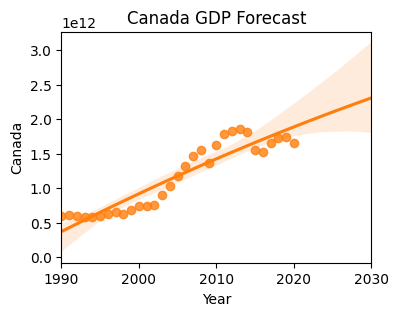

<Figure size 640x480 with 0 Axes>

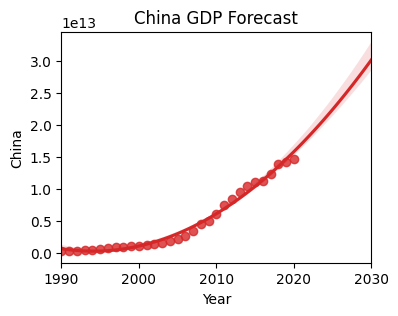

<Figure size 640x480 with 0 Axes>

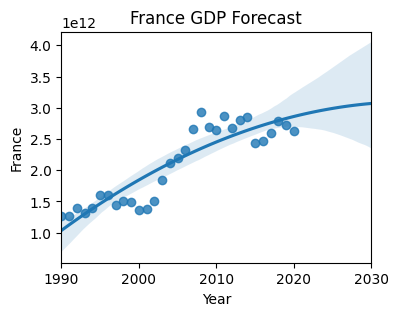

<Figure size 640x480 with 0 Axes>

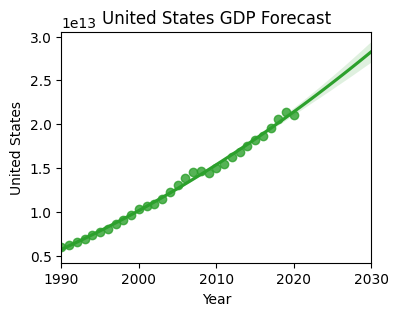

In [9]:
# GDP Long Term

x = df_GDP_current_long_cut.index
x_new = np.int64(x)

# GDP Per Country
for count, var in enumerate(countries):
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots(figsize=(4, 3))
    xlim = [1990, 2030]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    if count == 0:
        color = 'tab:orange'
    elif count == 1:
        color = color='tab:red'
    elif count == 2:
        color = color='tab:blue'
    elif count == 3:
        color = color='tab:green'
    graph = sns.regplot(x=x_new, y=var, data=df_GDP_current_long_cut, order=2, color= color, truncate=False, ax=ax).set(title=f'{var} GDP Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    # This will add label to X-axis
    plt.xlabel("Year")
    graph

ValueError: regplot inputs must be 1d

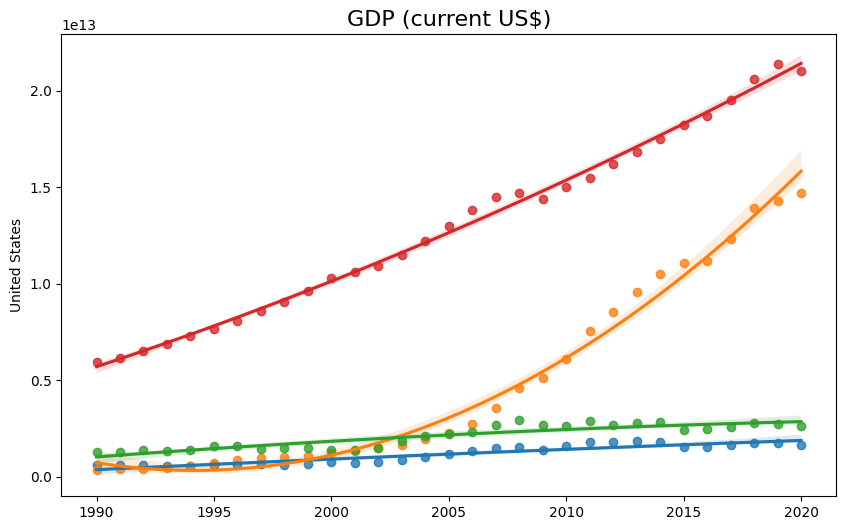

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

x = list(range(1990, 2021))
y_in = df_GDP_current_long_cut
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020, 2031).reshape(-1, 1)
pred_new = poly_reg_model.predict(poly.transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("GDP (current US$)", size=16)

for data in countries:
    sns.regplot(x=x, y=y_in[data], order=2, label=data)

sns.regplot(x=x, y=y_predicted, scatter=False, color='black', label='Polynomial Regression')
sns.regplot(x=x_new.flatten(), y=pred_new, scatter=False, linestyle='--', color='red')

plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.show()

# Print the x and y data
#print(list(zip(x_new.flatten(), pred_new)))


In [9]:
# GDP Short Term

x = df_GDP_current_short_cut.index
x_new = np.int64(x)

# GDP Per Country
for var in countries:
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots()
    xlim = [2010, 2024]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    graph = sns.regplot(x=x_new, y=var, data=df_GDP_current_short_cut, order=2, truncate=False, ax=ax).set(title=f'Short Term {var} GDP Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    graph

In [10]:
#IN PROGRESS

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = list(range(2010, 2021))
y_in = df_GDP_current_short_cut
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020, 2031).reshape(-1, 1)
pred_new = poly_reg_model.predict(poly.transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("GDP (current US($) Short Term", size=16)
for data in countries:
    plt.scatter(x, y_in[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)

lines = plt.plot(x_new, pred_new)
x_new_data = lines[0].get_xdata()
y_new_data = lines[0].get_ydata()

# Print the x and y data
print(list(zip(x_new_data, y_new_data)))

plt.xlabel('Year')
plt.ylabel('GDP (current US($)) (%)')
plt.show()


In [11]:
# Inflation Long Term
countries = ['Canada', 'China', 'France', 'United States']

x = df_inflation_long_cut.index
x_new = np.int64(x)

# GDP Per Country
for var in countries:
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots()
    xlim = [1990, 2033]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    graph = sns.regplot(x=x_new, y=var, data=df_inflation_long_cut, order=2, truncate=False, ax=ax).set(title=f'Long Term {var} Inflation Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    graph

In [12]:
# IN Progress

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = list(range(1990, 2022))
y_in = df_inflation_long_cut
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020, 2033).reshape(-1, 1)
pred_new = poly_reg_model.predict(poly.transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("Inflation Long Cut", size=16)
for data in countries:
    plt.scatter(x, y_in[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)

lines = plt.plot(x_new, pred_new)
x_new_data = lines[0].get_xdata()
y_new_data = lines[0].get_ydata()

# Print the x and y data
print(list(zip(x_new_data, y_new_data)))

plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.show()


In [13]:
# Inflation Short Term
countries = ['Canada', 'China', 'France', 'United States']

x = df_inflation_short_cut.index
x_new = np.int64(x)

# GDP Per Country
for var in countries:
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots()
    xlim = [2010, 2024]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    graph = sns.regplot(x=x_new, y=var, data=df_inflation_short_cut, order=2, truncate=False, ax=ax).set(title=f'Short Term {var} Inflation Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    graph

In [14]:
# IN Progress

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = list(range(2010, 2022))
y_in = df_inflation_short_cut
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020, 2024).reshape(-1, 1)
pred_new = poly_reg_model.predict(poly.transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("Inflation Short Term", size=16)
for data in countries:
    plt.scatter(x, y_in[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)

lines = plt.plot(x_new, pred_new)
x_new_data = lines[0].get_xdata()
y_new_data = lines[0].get_ydata()

# Print the x and y data
print(list(zip(x_new_data, y_new_data)))

plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.show()


In [11]:
# Total pop. Long term

x = df_total_pop_long_cut.index
x_new = np.int64(x)

# GDP Per Country
for var in countries:
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots()
    xlim = [1990, 2033]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    graph = sns.regplot(x=x_new, y=var, data=df_total_pop_long_cut, order=2, truncate=False, ax=ax).set(title=f'Long Term {var} Population Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    graph

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = list(range(1990, 2021))
y_in = df_total_pop_long_cut
countries = ['Canada', 'China', 'France', 'United States']
x_future = list(range(1990, 2034))  # Extend x-values up to 2033

plt.figure(figsize=(10, 6))
plt.title("Total Population Long Cut", size=16)

for data in countries:
    # Perform polynomial regression
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_in[data])
    
    # Generate predictions for the extended x-values
    poly_features_future = poly.transform(np.array(x_future).reshape(-1, 1))
    y_predicted_future = poly_reg_model.predict(poly_features_future)
    
    # Plot the regression line for the available data
    sns.regplot(x=x, y=y_in[data], order=2, label=f'{data} Regression')
    
    # Plot the predicted values for the future years
    sns.regplot(x=x, y=y_in[data] + y_predicted_future, label=f'{data} Prediction')

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.show()


In [17]:
# Total pop. Short term

x = df_total_pop_short_cut.index
x_new = np.int64(x)

# GDP Per Country
for var in countries:
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots()
    xlim = [2010, 2024]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    graph = sns.regplot(x=x_new, y=var, data=df_total_pop_short_cut, order=2, truncate=False, ax=ax).set(title=f'Short Term {var} Population Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    graph

In [18]:
# IN Progress

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = list(range(2010, 2021))
y_in = df_total_pop_short_cut
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020, 2033).reshape(-1, 1)
pred_new = poly_reg_model.predict(poly.transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("Total Population Short Term", size=16)
for data in countries:
    plt.scatter(x, y_in[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)

lines = plt.plot(x_new, pred_new)
x_new_data = lines[0].get_xdata()
y_new_data = lines[0].get_ydata()

# Print the x and y data
print(list(zip(x_new_data, y_new_data)))

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.show()


In [19]:
# Unemployement Long term

x = df_unemployed_long_cut.index
x_new = np.int64(x)

# Unemployement Per Country
for var in countries:
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots()
    xlim = [1990, 2033]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    graph = sns.regplot(x=x_new, y=var, data=df_unemployed_long_cut, order=2, truncate=False, ax=ax).set(title=f'Long Term {var} Unemployment Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    #   print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    graph

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = list(range(1990, 2022))
y_in = df_unemployed_long_cut.fillna(0)  # Fill missing values with 0 or another appropriate value
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020, 2033).reshape(-1, 1)
pred_new = poly_reg_model.predict(poly.transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("Unemployment Long Cut", size=16)
for data in countries:
    plt.scatter(x, y_in[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)

lines = plt.plot(x_new, pred_new)
x_new_data = lines[0].get_xdata()
y_new_data = lines[0].get_ydata()

# Print the x and y data
print(list(zip(x_new_data, y_new_data)))

plt.xlabel('Year')
plt.ylabel('Unemployment(%)')
plt.show()


In [21]:
# Unemployement Short term

x = df_unemployed_short_cut.index
x_new = np.int64(x)

# Unemployement Per Country
for var in countries:
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots()
    xlim = [2010, 2024]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    graph = sns.regplot(x=x_new, y=var, data=df_unemployed_short_cut, order=2, truncate=False, ax=ax).set(title=f'Short Term {var} Unemployment Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    graph

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = list(range(2010, 2022))
y_in = df_unemployed_short_cut.fillna(0)  # Fill missing values with 0 or another appropriate value
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.array(x).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020, 2033).reshape(-1, 1)
pred_new = poly_reg_model.predict(poly.transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("Unemployment Long Cut", size=16)
for data in countries:
    plt.scatter(x, y_in[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)

lines = plt.plot(x_new, pred_new)
x_new_data = lines[0].get_xdata()
y_new_data = lines[0].get_ydata()

# Print the x and y data
print(list(zip(x_new_data, y_new_data)))

plt.xlabel('Year')
plt.ylabel('Unemployment(%)')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ac77d8c-6104-40ce-94f9-fbd01a76a8e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>